In [1]:
print("""
@File         : 2-plotting_with_pandas.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-11 21:18:31
@Email        : cuixuanstephen@gmail.com
@Description  : Plotting with pandas
""")


@File         : 2-plotting_with_pandas.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-11 21:18:31
@Email        : cuixuanstephen@gmail.com
@Description  : Plotting with pandas



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    "data/fb_stock_prices_2018.csv",
    index_col="date", parse_dates=True
)

quakes = pd.read_csv("data/earthquakes.csv")

covid = pd.read_csv("data/covid19_cases.csv").assign(
    date=lambda x: pd.to_datetime(x["dateRep"], format="%d/%m/%Y")
).set_index("date").replace("United_States_of_America", "USA").sort_index()["2020-01-18": "2020-09-18"]

#### Evolution over time

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

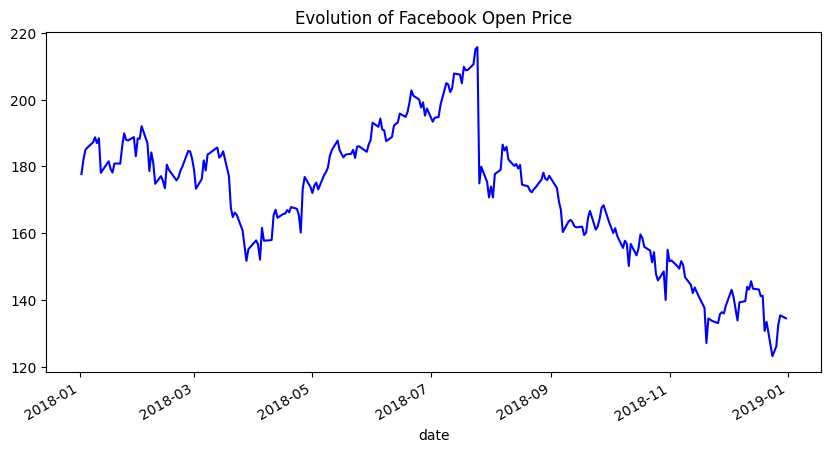

In [4]:
fb.plot(kind="line", y="open", figsize=(10, 5), style='-b', legend=False, 
        title="Evolution of Facebook Open Price")

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

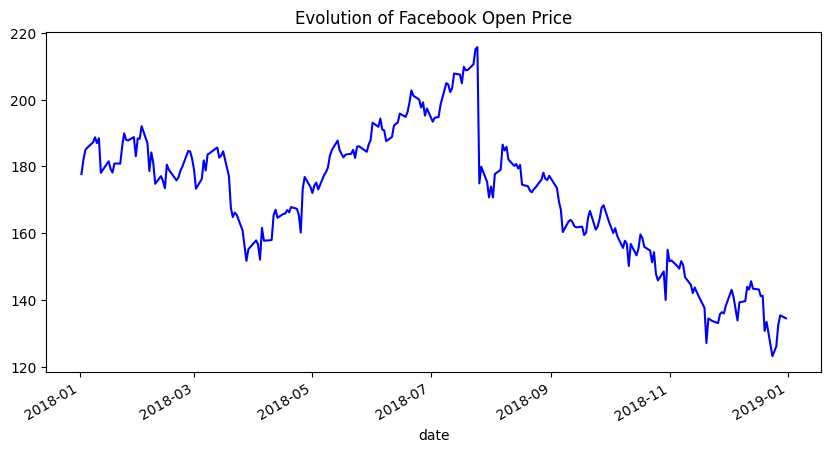

In [6]:
fb.plot(kind="line", y="open", figsize=(10, 5), color="blue", linestyle="solid", legend=False, 
        title="Evolution of Facebook Open Price")

C:\Users\JPL-JUNO\AppData\Local\Temp\ipykernel_15852\3684991546.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first("1W").plot(


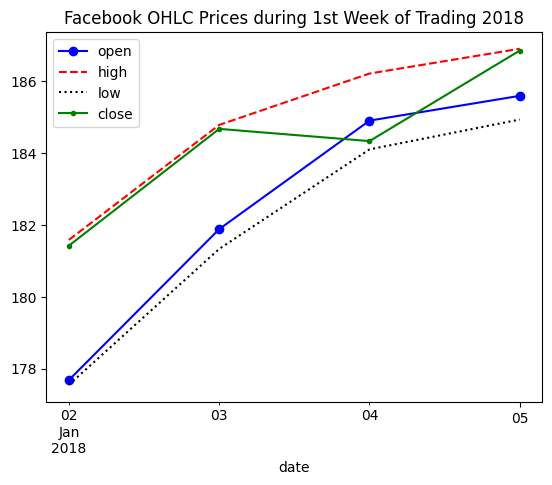

In [10]:
fb.first("1W").plot(
    y=["open", "high", "low", "close"],
    style=["o-b", "--r", ":k", ".-g"],
    title="Facebook OHLC Prices during 1st Week of Trading 2018"
).autoscale()

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

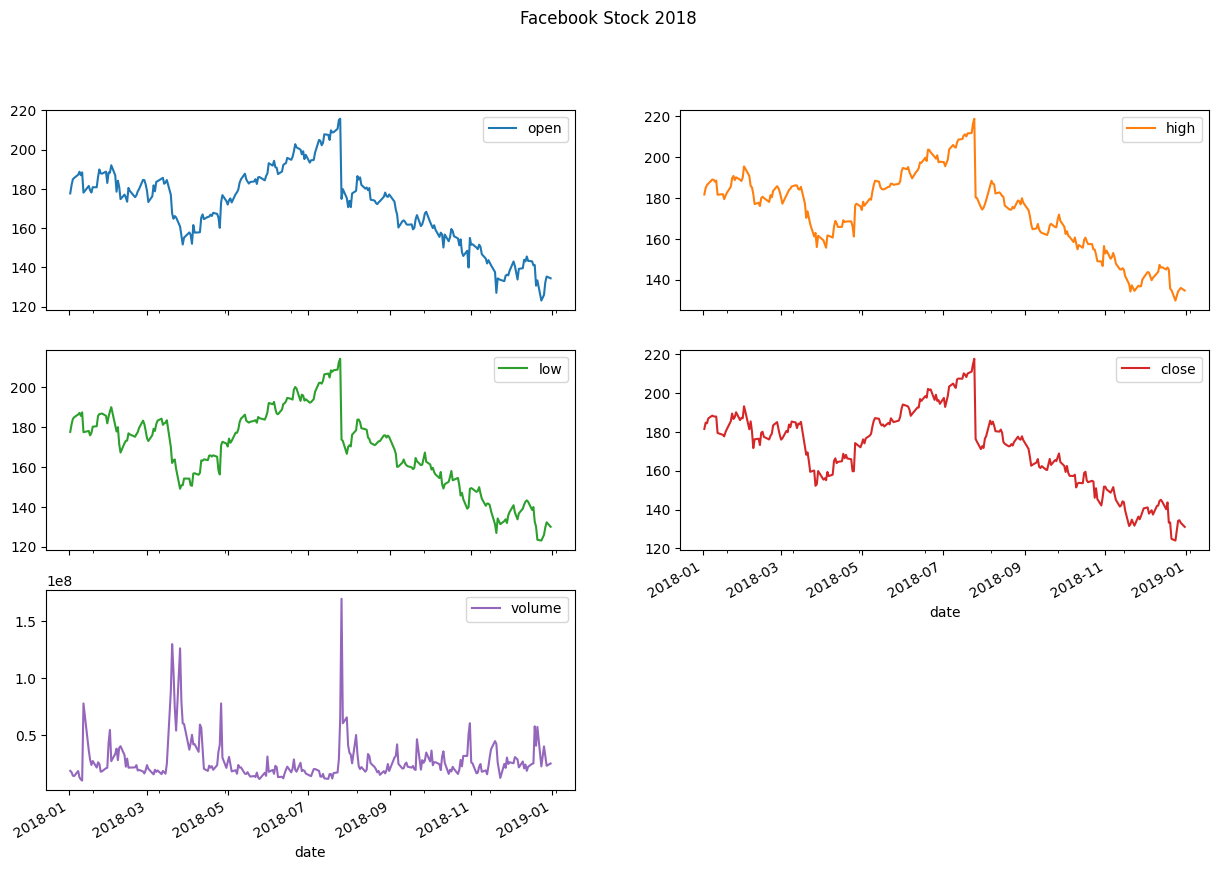

In [14]:
fb.plot(
    kind="line", subplots=True, layout=(3, 2),
    figsize=(15, 10), title="Facebook Stock 2018"
)

In [21]:
new_cases_rolling_average = covid.pivot(columns="countriesAndTerritories", values="cases").fillna(0).rolling(7).mean()

<Axes: xlabel='date'>

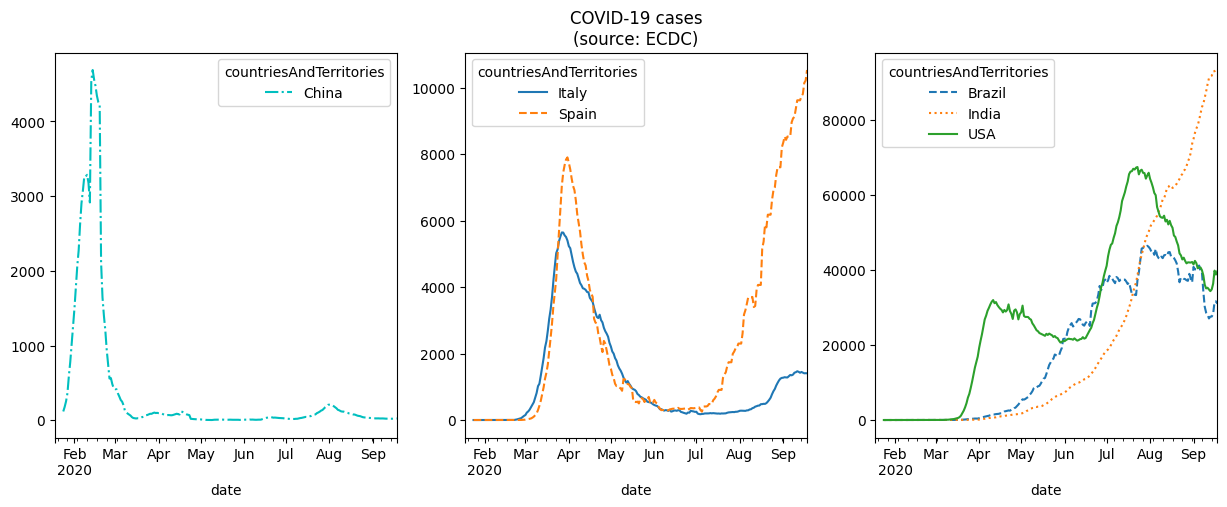

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[["Italy", "Spain"]].plot(ax=axes[1],
                                                   style=['-', "--"],
                                                   title="COVID-19 cases\n(source: ECDC)")
new_cases_rolling_average[["Brazil", "India", "USA"]].plot(ax=axes[2], style=["--", ":", "-"])

<Axes: title={'center': '7-day rolling average of new COVID-19 cases\n(source: ECDC)'}, xlabel='date'>

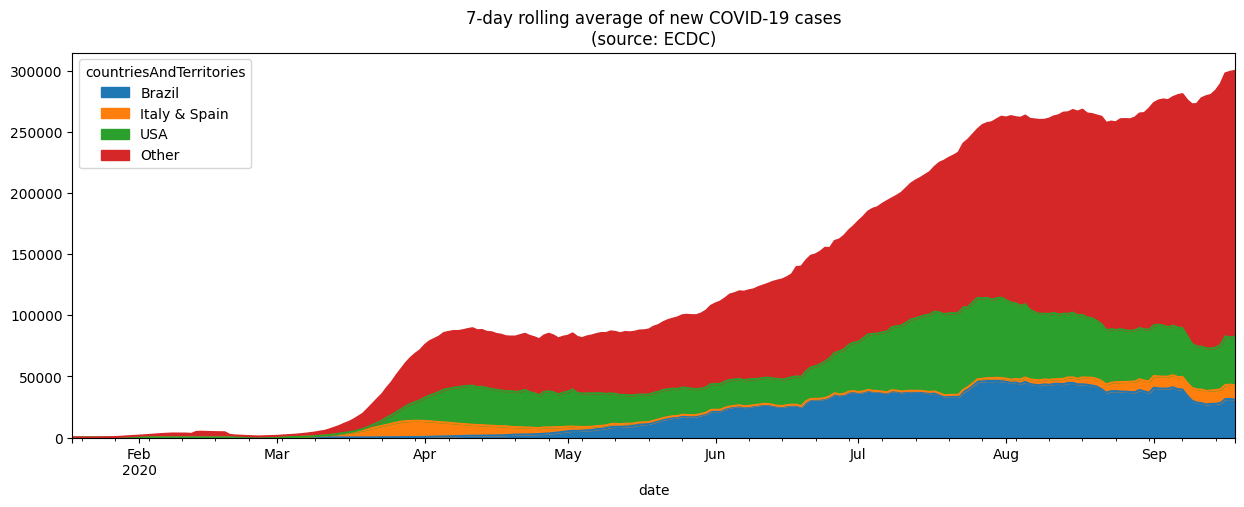

In [35]:
cols = [
    col for col in new_cases_rolling_average.columns
    if col not in ["USA", "Brazil", "Italy & Spain"]
]

new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x["Italy"] + x["Spain"]}
).sort_index(axis='columns').assign(
    Other=lambda x: x[cols].sum(axis='columns')
).drop(columns=cols).plot(
    kind="area", figsize=(15, 5),
    title="7-day rolling average of new COVID-19 cases\n(source: ECDC)"
)

<Axes: xlabel='date'>

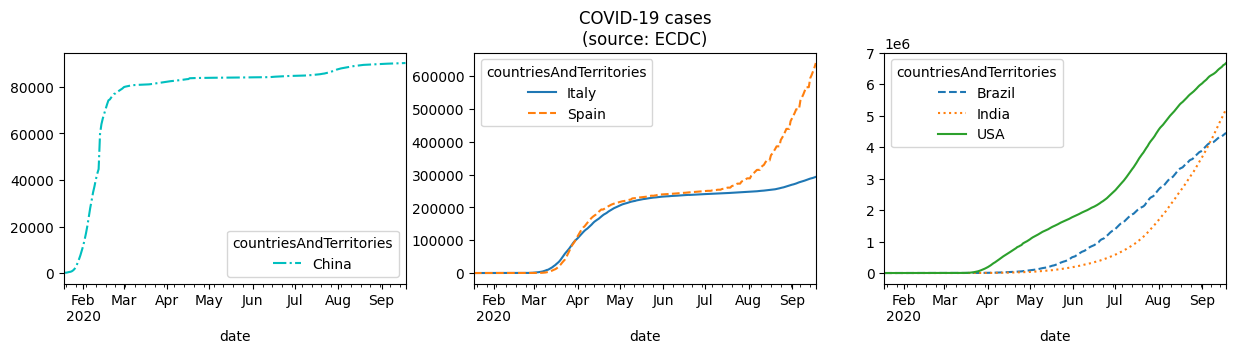

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
)['cases'].sum().unstack(level=0).cumsum()

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[["Italy", "Spain"]].plot(ax=axes[1],
                                                style=['-', "--"],
                                                title="COVID-19 cases\n(source: ECDC)")
cumulative_covid_cases[["Brazil", "India", "USA"]].plot(ax=axes[2], style=["--", ":", "-"])

#### Relationships between variables

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

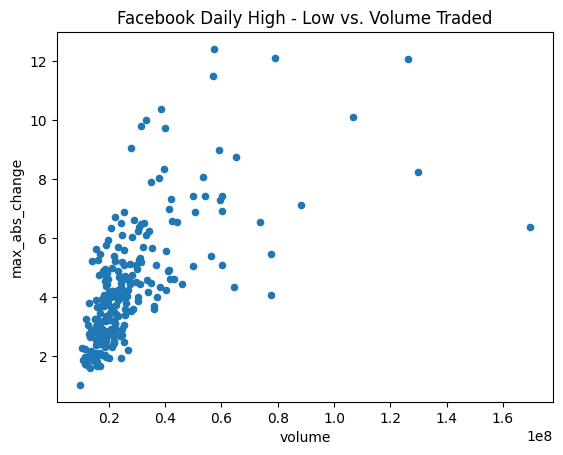

In [44]:
fb.assign(
    max_abs_change=lambda x: x["high"] - x["low"]
).plot(kind='scatter', x='volume', y='max_abs_change',
       title="Facebook Daily High - Low vs. Volume Traded")

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

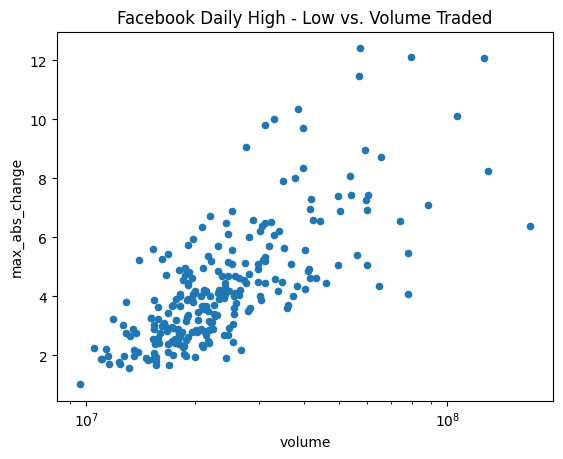

In [45]:
fb.assign(
    max_abs_change=lambda x: x["high"] - x["low"]
).plot(kind='scatter', x='volume', y='max_abs_change',
       title="Facebook Daily High - Low vs. Volume Traded",
       logx=True)

<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

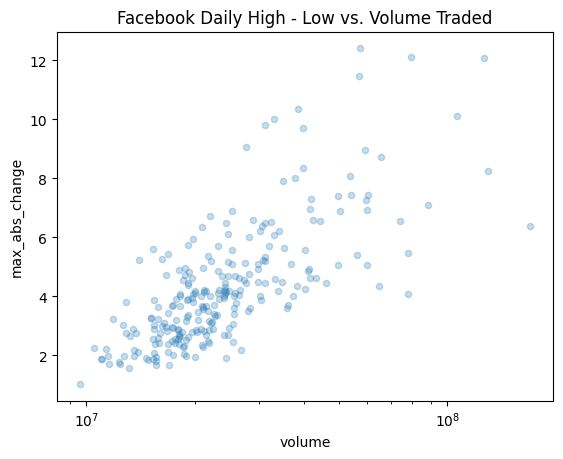

In [46]:
fb.assign(
    max_abs_change=lambda x: x["high"] - x["low"]
).plot(kind='scatter', x='volume', y='max_abs_change',
       title="Facebook Daily High - Low vs. Volume Traded",
       logx=True, alpha=.25)

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

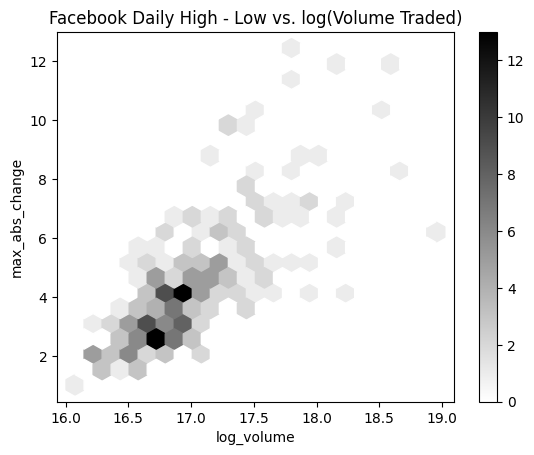

In [49]:
fb.assign(
    max_abs_change=lambda x: x["high"] - x["low"],
    log_volume=lambda x: np.log(x["volume"])
).plot(kind='hexbin', x='log_volume', y='max_abs_change',
       title="Facebook Daily High - Low vs. log(Volume Traded)",
       colormap='gray_r', gridsize=20, sharex=False)